In [1]:
# CSV読み込み用
import pandas as pd

# 計算用
import numpy as np
from scipy.spatial import distance

# グラフ用
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# Rに入っているDavisデータの読み込み
# https://www.kaggle.com/ravinduabey/davis-data-set
df = pd.read_csv("Davis.csv")
df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


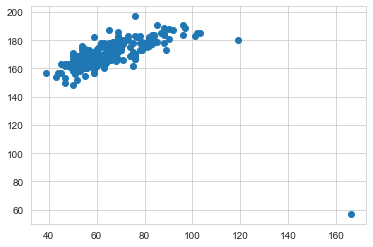

In [3]:
# データをweightとheightに絞る
df = df[['weight','height']]
plt.scatter(df['weight'].values,df['height'].values)

In [4]:
data = df.values
data.shape

(200, 2)

In [5]:
# 平均
mean = np.mean(data, axis=0)
# 平均引いた値
data_m = data - mean
# 共分散
cov = np.cov(data.T)

In [6]:
# distance.mahalanobisを使ってみた場合
result_1 = []
# データ: data[i], 平均値: mean, 共分散行列の逆行列: np.linalg.pinv(cov) から距離を計算
for i in range(len(data_m)):
    result_1.append(distance.mahalanobis(data[i], mean, np.linalg.pinv(cov)))

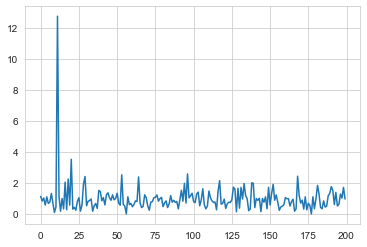

In [7]:
# 結果
plt.plot(result_1)

In [8]:
# pythonの関数の計算
result_2 = np.sqrt(np.sum(np.dot(data_m,np.linalg.pinv(cov))*data_m, axis=1))

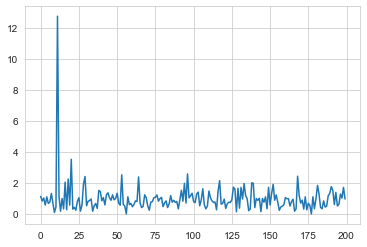

In [9]:
# 結果
plt.plot(result_2)